### 요일별 분석

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.font_manager as fm

In [2]:
plt.rcParams['font.family']='HYGPRM'

In [3]:
df1=pd.read_csv("MetroData/2201.csv")
df2=pd.read_csv("MetroData/2202.csv")
df3=pd.read_csv("MetroData/2203.csv")
df4=pd.read_csv("MetroData/2204.csv")
df5=pd.read_csv("MetroData/2205.csv")
df6=pd.read_csv("MetroData/2206.csv")
df7=pd.read_csv("MetroData/2207.csv")
df8=pd.read_csv("MetroData/2208.csv")
df9=pd.read_csv("MetroData/2022.csv")
df10=pd.read_csv("MetroData/detail.csv")

In [4]:
df9.요일.unique()

array(['토', '일', '월', '화', '수', '목', '금'], dtype=object)

### 요일별 승객 데이터

In [5]:
df9[["요일", "승차승객", "하차승객", "총 승객"]].groupby(["요일"]).mean()

,승차승객,하차승객,총 승객
요일,,,
금,11615.964436,11578.407808,23194.372245
목,11093.641590,11059.454127,22153.095717
수,10845.701881,10812.150012,21657.851892
월,10469.655878,10436.874964,20906.530842
일,5942.629578,5908.417159,11851.046738
토,8031.146395,7992.965282,16024.111677
화,10865.970183,10832.206525,21698.176709


In [6]:
df9[["요일", "승차승객", "하차승객", "총 승객"]].groupby(["요일"]).sum()

,승차승객,하차승객,총 승객
요일,,,
금,237128298,236361617,473489915
목,226354663,225657102,452011765
수,227813968,227109211,454923179
월,219967470,219278743,439246213
일,124605057,123887691,248492748
토,168638012,167836285,336474297
화,228131044,227422176,455553220


### 많은 순으로 정렬

In [7]:
df9[["요일", "승차승객", "하차승객", "총 승객"]].groupby(["요일"]).mean().sort_values(by="총 승객", ascending=False)

,승차승객,하차승객,총 승객
요일,,,
금,11615.964436,11578.407808,23194.372245
목,11093.641590,11059.454127,22153.095717
화,10865.970183,10832.206525,21698.176709
수,10845.701881,10812.150012,21657.851892
월,10469.655878,10436.874964,20906.530842
토,8031.146395,7992.965282,16024.111677
일,5942.629578,5908.417159,11851.046738


In [8]:
df9[["요일", "승차승객", "하차승객", "총 승객"]].groupby(["요일"]).sum().sort_values(by="총 승객", ascending=False)

,승차승객,하차승객,총 승객
요일,,,
금,237128298,236361617,473489915
화,228131044,227422176,455553220
수,227813968,227109211,454923179
목,226354663,225657102,452011765
월,219967470,219278743,439246213
토,168638012,167836285,336474297
일,124605057,123887691,248492748


### 결과 확인
#### 총 승객 평균 정보
 - 주중의 승객 수가 많고, 주말의 승객 수가 적다
 - 금요일 승객이 가장 많고, 일요일에 가장 적다
#### 총 승객 합 정보
 - 주중의 승객 수가 많고, 주말의 승객 수가 적다
 - 금요일 승객이 가장 많고, 일요일에 가장 적다
#### 차이점
 - 화, 수, 목은 평균치와 합에 따라 순서가 바뀌기도 한다
 - 금요일이 승객이 가장 많고, 월, 토, 일 순으로 적은 것은 평균과 합이 같다

### 요일별 그래프

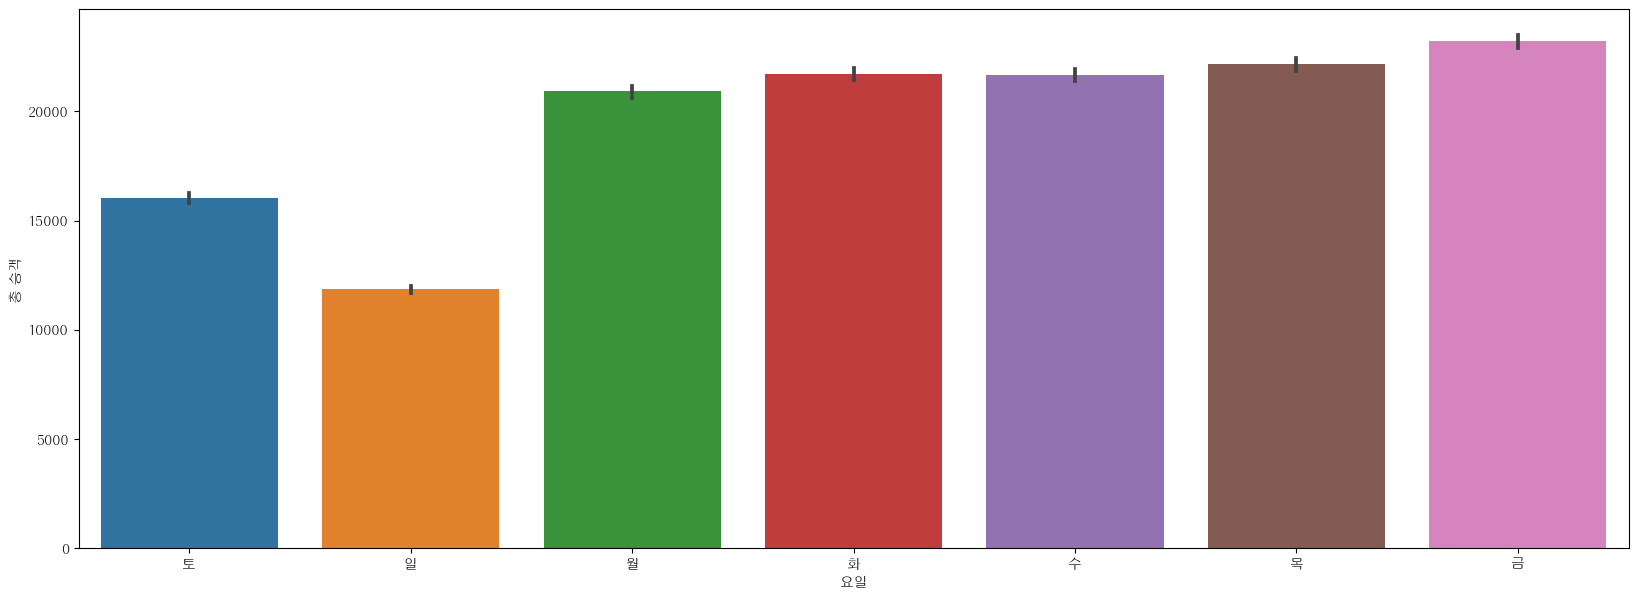

In [13]:
plt.subplots(figsize=(20, 7))
sns.barplot(data=df9, x="요일", y="총 승객")
plt.show()

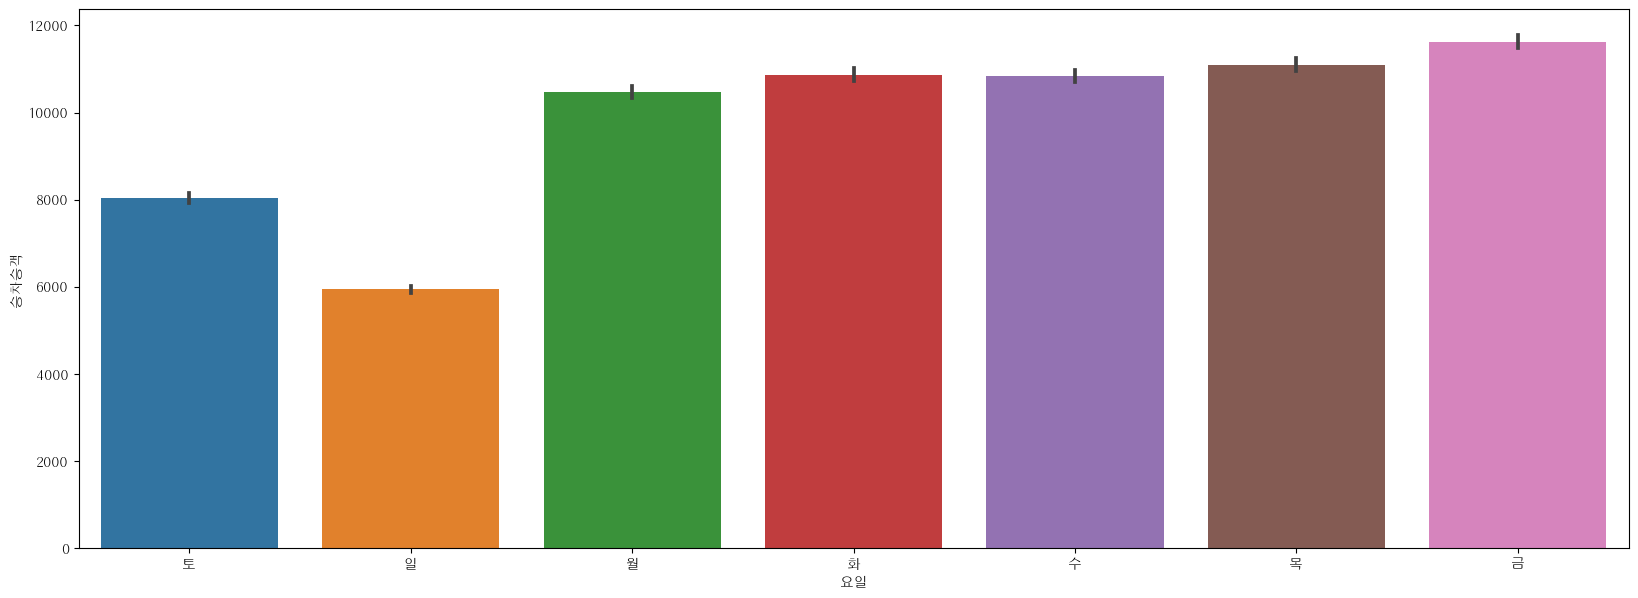

In [14]:
plt.subplots(figsize=(20, 7))
sns.barplot(data=df9, x="요일", y="승차승객")
plt.show()

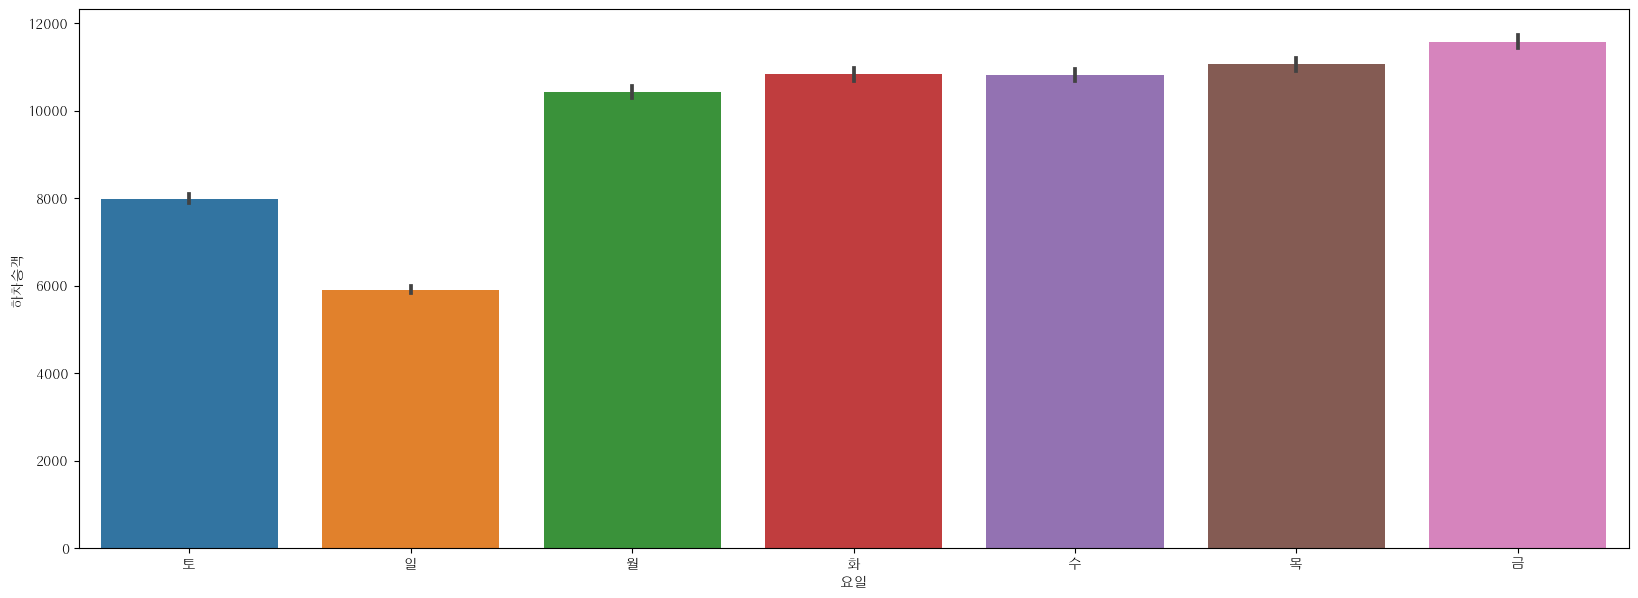

In [15]:
plt.subplots(figsize=(20, 7))
sns.barplot(data=df9, x="요일", y="하차승객")
plt.show()

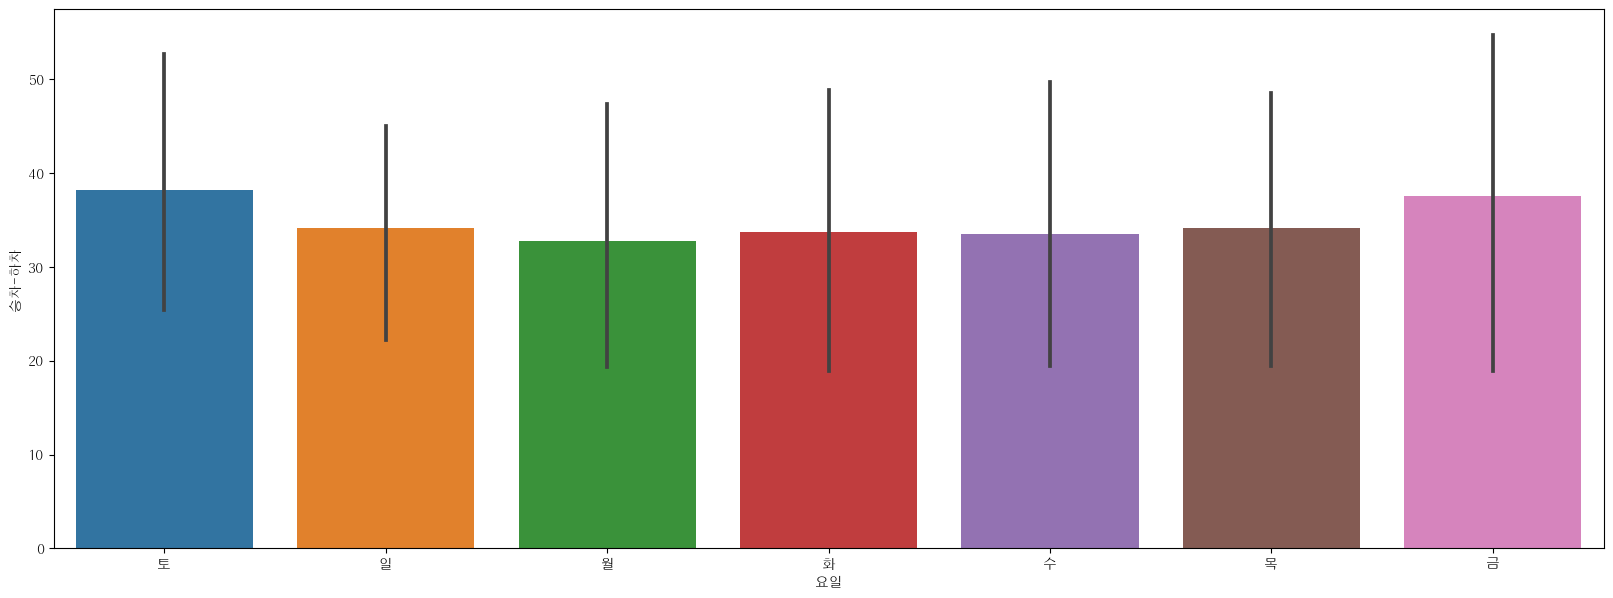

In [16]:
plt.subplots(figsize=(20, 7))
sns.barplot(data=df9, x="요일", y="승차-하차")
plt.show()

In [17]:
df9.요일.value_counts().sort_values(ascending=False)

월    21010
수    21005
토    20998
화    20995
일    20968
금    20414
목    20404
Name: 요일, dtype: int64

### 요일별 승객 그래프

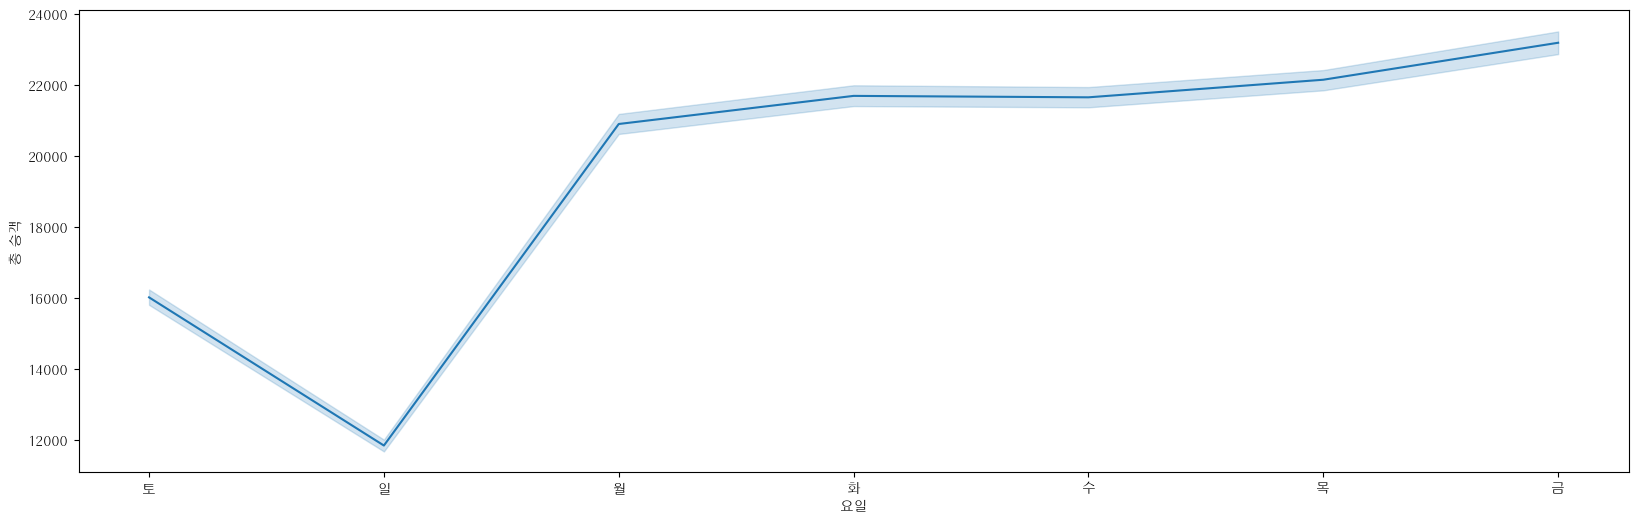

In [18]:
plt.subplots(figsize=(20, 6))
sns.lineplot(data=df9, x="요일", y="총 승객")
plt.show()

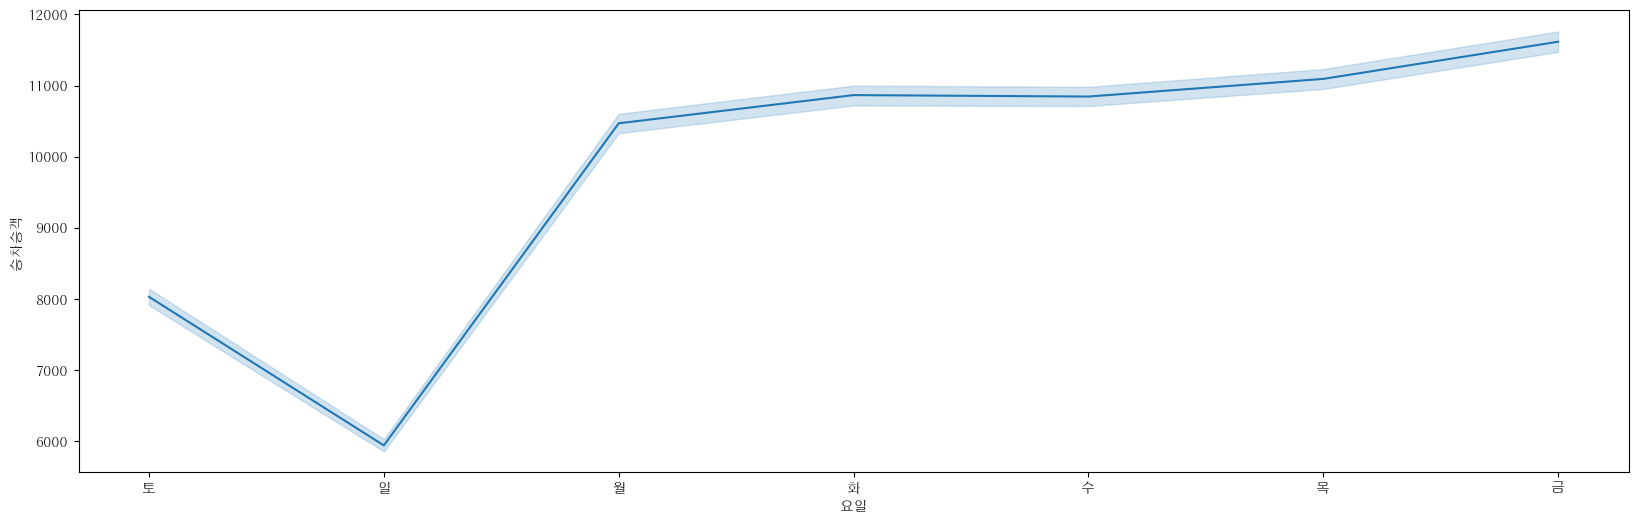

In [19]:
plt.subplots(figsize=(20, 6))
sns.lineplot(data=df9, x="요일", y="승차승객")
plt.show()

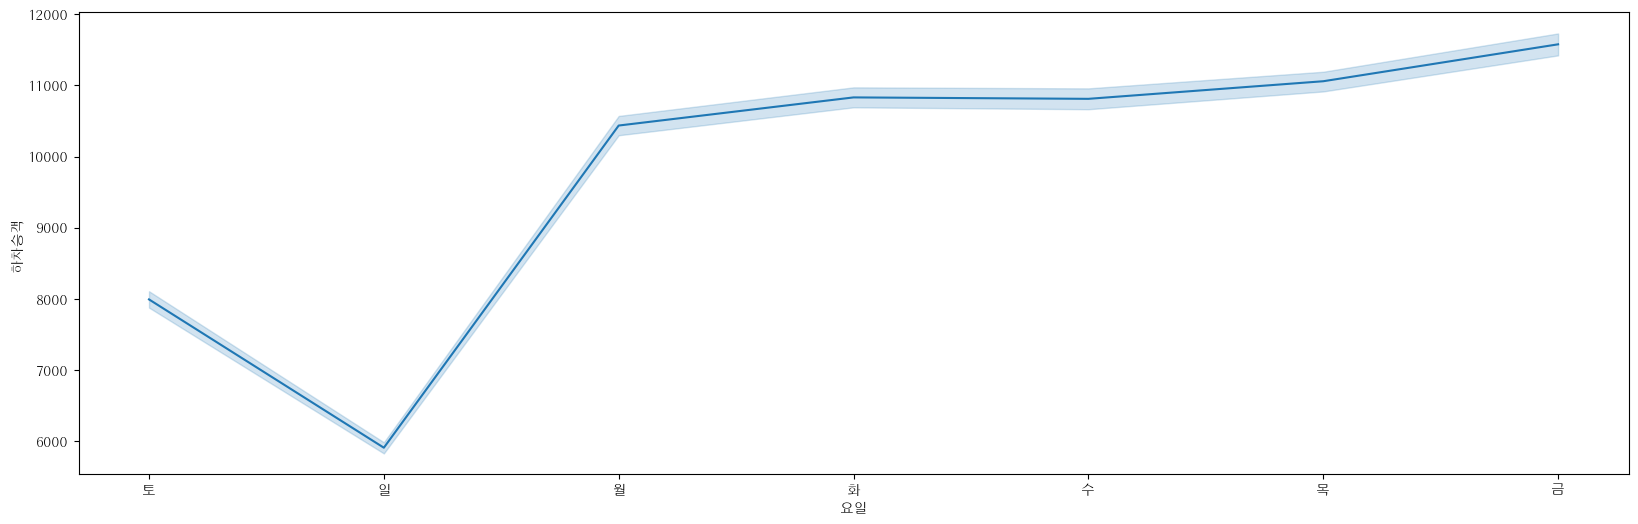

In [20]:
plt.subplots(figsize=(20, 6))
sns.lineplot(data=df9, x="요일", y="하차승객")
plt.show()

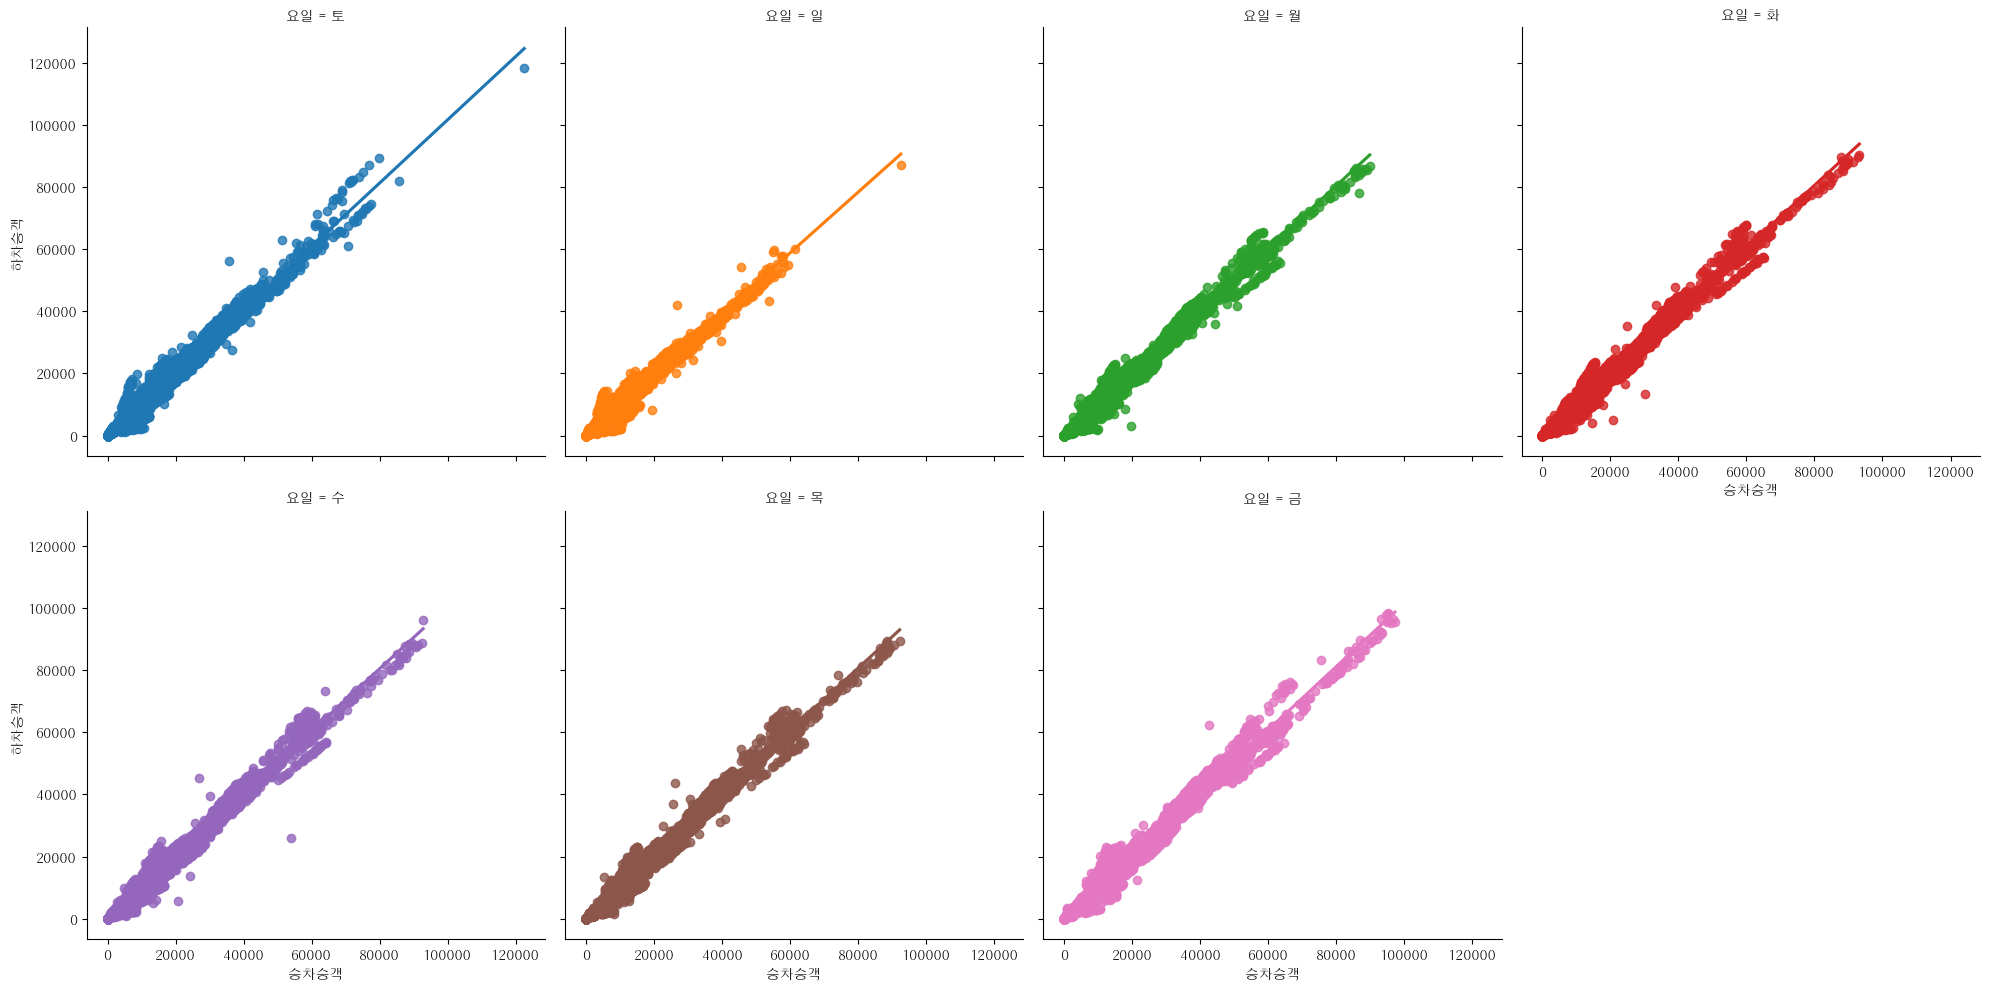

In [21]:
sns.lmplot(data=df9, x="승차승객", y="하차승객", hue="요일", col="요일", col_wrap=4)

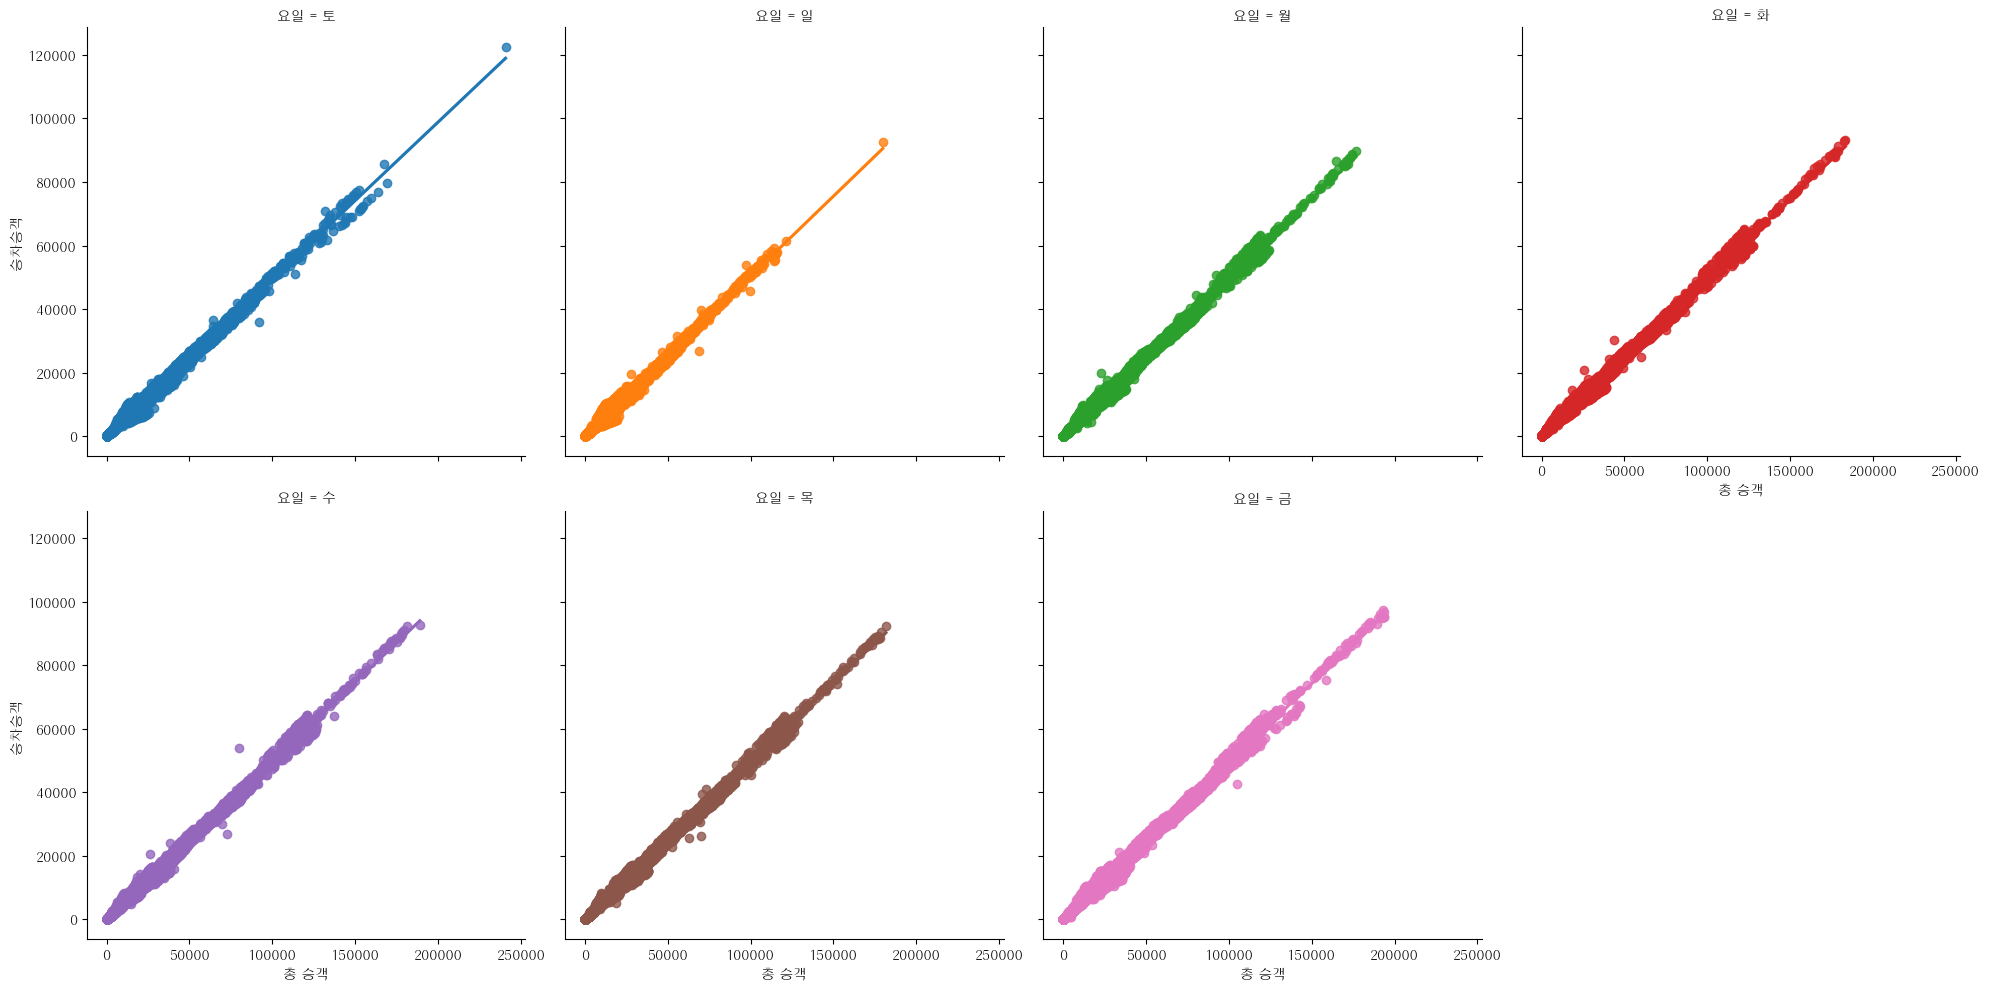

In [22]:
sns.lmplot(data=df9, x="총 승객", y="승차승객", hue="요일", col="요일", col_wrap=4)

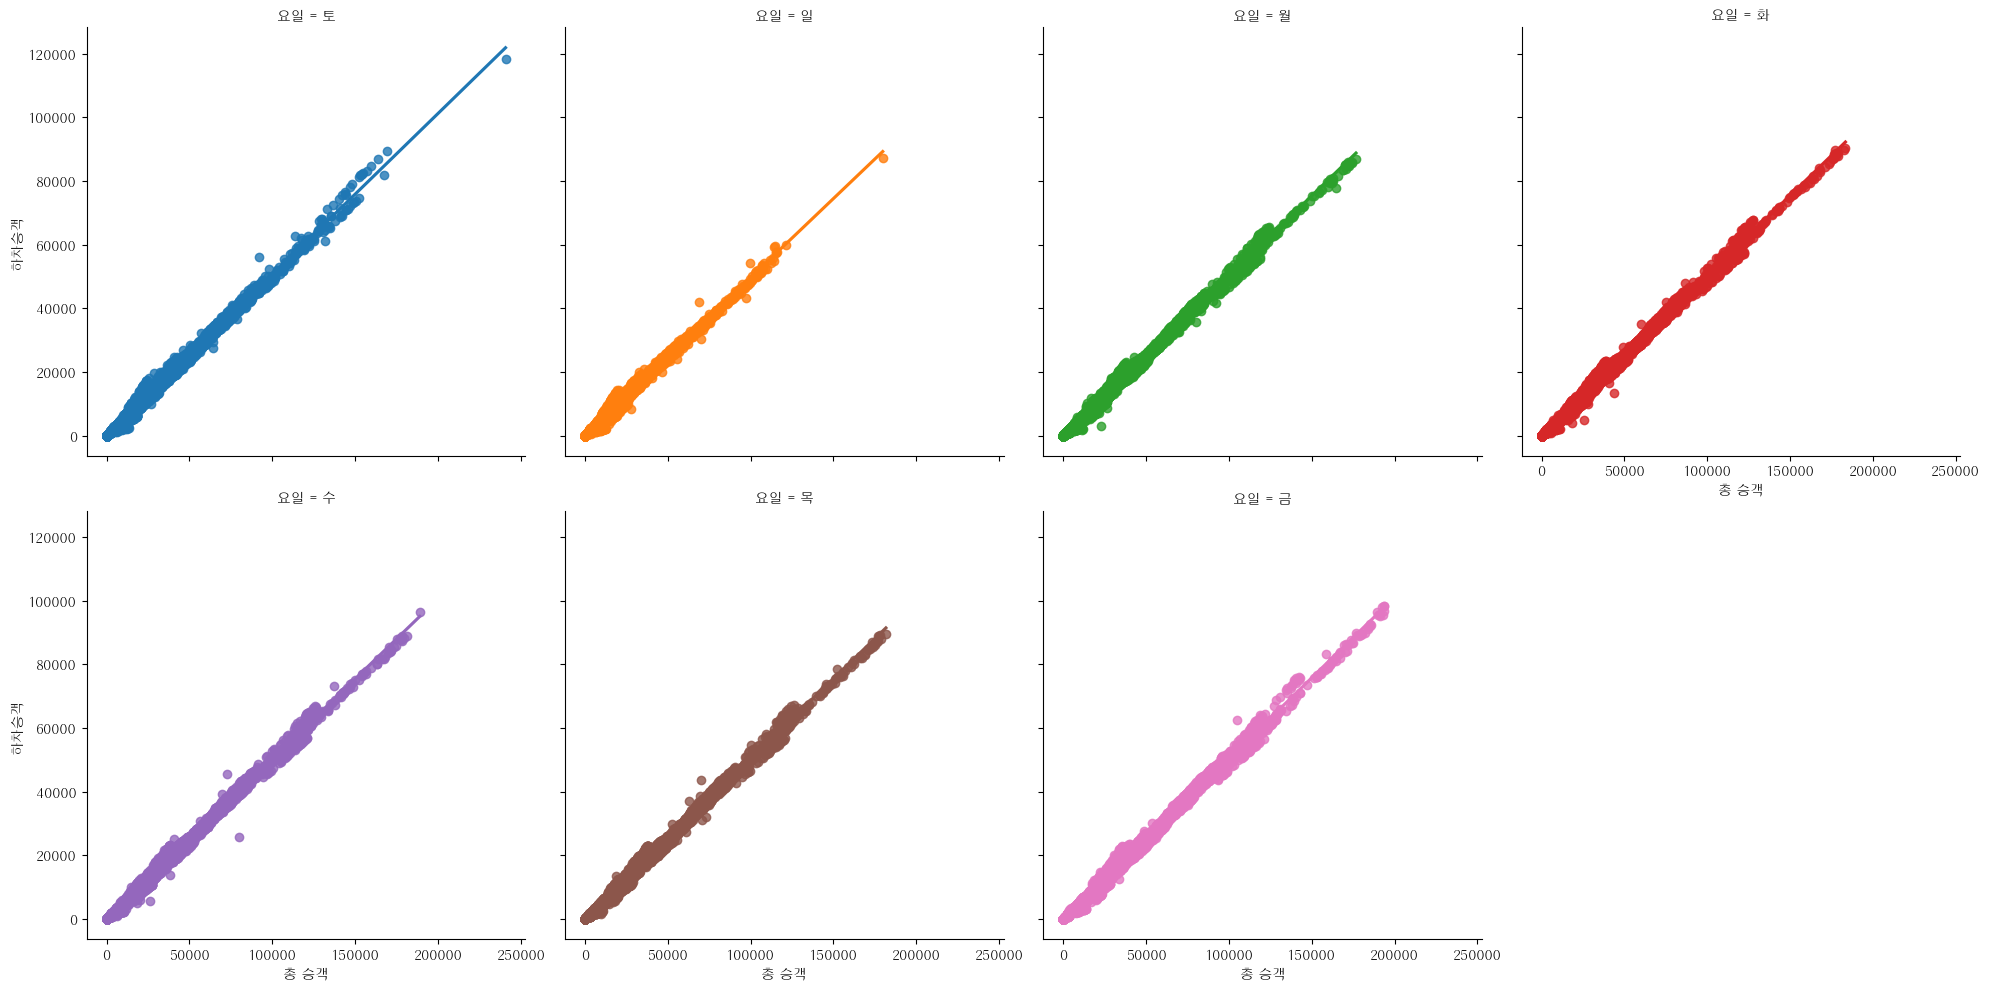

In [23]:
sns.lmplot(data=df9, x="총 승객", y="하차승객", hue="요일", col="요일", col_wrap=4)

### 그래프 확인
 - 주말(토요일과 일요일)에는 총 승객, 승차승객, 하차승객의 수가 적은 곳에 빈도가 높다
 - 주중에는 총 승객, 승차승객, 하차승객의 수가 골고루 분포되어 있다
 - 주중은 주말에 비해 총 승객, 승차승객, 하차승객이 많은 곳의 빈도가 더 높다